In [26]:
import sys
sys.path.append('Scripts')
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import path, generate_time_series
from sklearn import preprocessing
import os
import gc

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField, MarkovTransitionField, RecurrencePlot

def read_data(dataframe):
    return pd.read_csv(dataframe['path'], names = range(1, 16+1), dtype = float)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Gramian Angular Field Script

In [5]:
dataType = '512'
method = 'Simple'
gafType = 'difference' # summation or difference
methodDict = {
    'Simple': ['Dados_BCI_Combinados', 'GAF_Combinados_'+gafType, 'Combined_'],
    'PCA': ['Dados_BCI_CombinadosPCA', 'GAF_PCA_'+gafType, 'PCA_'],
    'Processed': ['ProcessedSignals', 'GAF_ProcessedSignals_'+gafType, 'Processed_']
}
dataPath = path('C:\\Users\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][0]+'\\'+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][1]+"\\"+dataType)
# figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\0179520170504\\'+dataType)

data = pd.read_csv('SSVEPDataset'+methodDict[method][2]+dataType+".csv")

gasf = GramianAngularField(image_size = 256, method = gafType)
files = list(range(len(data)))
n = len(files)
x, y = 12, 12

In [6]:
n

2730

In [12]:
for i in range(2500, 2730):
    sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
    if sample[0][1] != 0:
        X = gasf.fit_transform(sample)
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (x, y))
        plt.axis('off')
        im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

        state = str(int(data.loc[i]['state']))
#         subject = str(data.loc[i]['subject'])
        subject = '0_'
        if data.loc[i]['path'][-6] == '\\':
            file = data.loc[i]['path'][-5]
        else:
            file = data.loc[i]['path'][-6:-4]

        try:
            fig.savefig(figPath()+'\\'+state+'\\'+subject+file+'_'+str(i)+".png", dpi = 200, bbox_inches = 'tight')
            plt.close()
        except:
            print("Error creating picture: {}".format(figPath()+'\\'+state+'\\0_'+file+".png"))

In [3]:
n

525

***

Markov Transition Field Script

In [18]:
dataType = '512'
method = 'Simple'
methodDict = {
    'Simple': ['Dados_BCI_Combinados', 'MTF_Combinados', 'Combined_'],
    'PCA': ['Dados_BCI_CombinadosPCA', 'MTF_PCA', 'PCA_'],
    'Processed': ['ProcessedSignals', 'MTF_ProcessedSignals', 'Processed_']
}
dataPath = path('C:\\Users\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][0]+'\\'+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][1]+"\\"+dataType)
# figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\0179520170504\\'+dataType)

data = pd.read_csv('SSVEPDataset'+methodDict[method][2]+dataType+".csv")

mtf = MarkovTransitionField(image_size = 256)
files = list(range(len(data)))
n = len(files)
x, y = 12, 12

In [25]:
for i in range(2500, 2730):
    sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
    if sample[0][1] != 0:
        X = mtf.fit_transform(sample)
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (x, y))
        plt.axis('off')
        im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

        state = str(int(data.loc[i]['state']))
#         subject = str(data.loc[i]['subject'])
        subject = '0_'
        if data.loc[i]['path'][-6] == '\\':
            file = data.loc[i]['path'][-5]
        else:
            file = data.loc[i]['path'][-6:-4]

        try:
            fig.savefig(figPath()+'\\'+state+'\\'+subject+file+'_'+str(i)+".png", dpi = 200, bbox_inches = 'tight')
            plt.close()
        except:
            print("Error creating picture: {}".format(figPath()+'\\'+state+'\\0_'+file+".png"))

***
Recurrence Plot Script

In [39]:
dataType = '512'
method = 'Simple'
methodDict = {
    'Simple': ['Dados_BCI_Combinados', 'RP_Combinados', 'Combined_'],
    'PCA': ['Dados_BCI_CombinadosPCA', 'RP_PCA', 'PCA_'],
    'Processed': ['ProcessedSignals', 'RP_ProcessedSignals', 'Processed_']
}
dataPath = path('C:\\Users\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][0]+'\\'+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][1]+"\\"+dataType)
# figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\0179520170504\\'+dataType)

data = pd.read_csv('SSVEPDataset'+methodDict[method][2]+dataType+".csv")

rp = RecurrencePlot(threshold = 'point', percentage = 25)
files = list(range(len(data)))
n = len(files)
x, y = 12, 12

In [45]:
for i in range(2500, 2730):
    sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
    if sample[0][1] != 0:
        X = mtf.fit_transform(sample)
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (x, y))
        plt.axis('off')
        im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

        state = str(int(data.loc[i]['state']))
#         subject = str(data.loc[i]['subject'])
        subject = '0_'
        if data.loc[i]['path'][-6] == '\\':
            file = data.loc[i]['path'][-5]
        else:
            file = data.loc[i]['path'][-6:-4]

        try:
            fig.savefig(figPath()+'\\'+state+'\\'+subject+file+'_'+str(i)+".png", dpi = 200, bbox_inches = 'tight')
            plt.close()
        except:
            print("Error creating picture: {}".format(figPath()+'\\'+state+'\\0_'+file+".png"))

***

Example

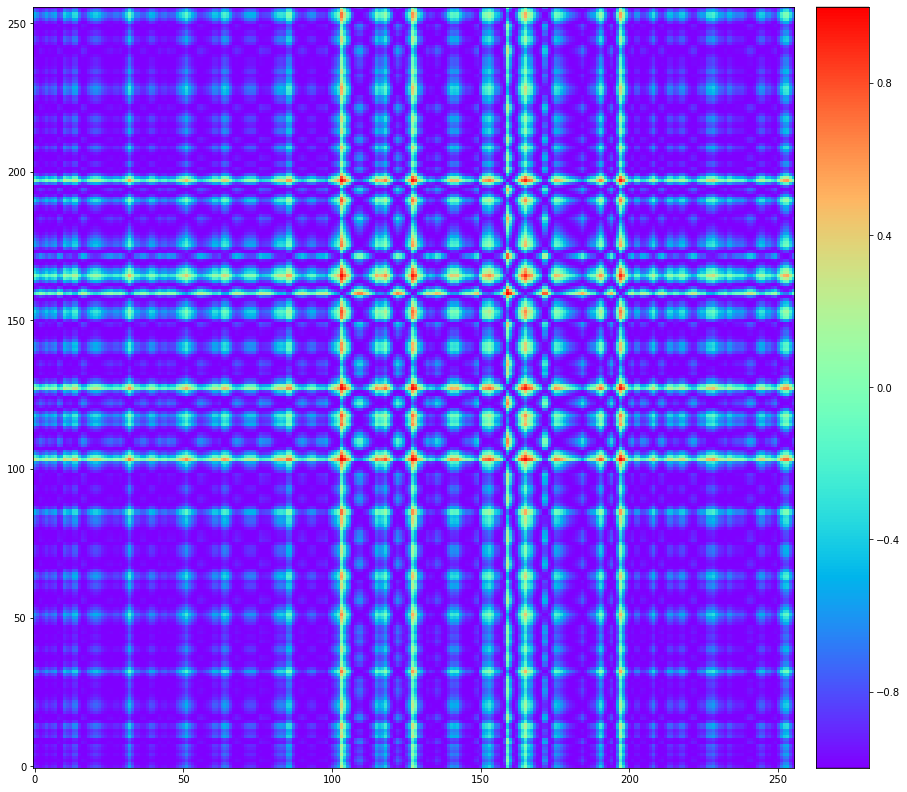

In [3]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
gasf = GramianAngularField(image_size = 256, method = 'summation')
X_gasf = gasf.fit_transform(sample)

fig = plt.figure(figsize = (24, 14))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

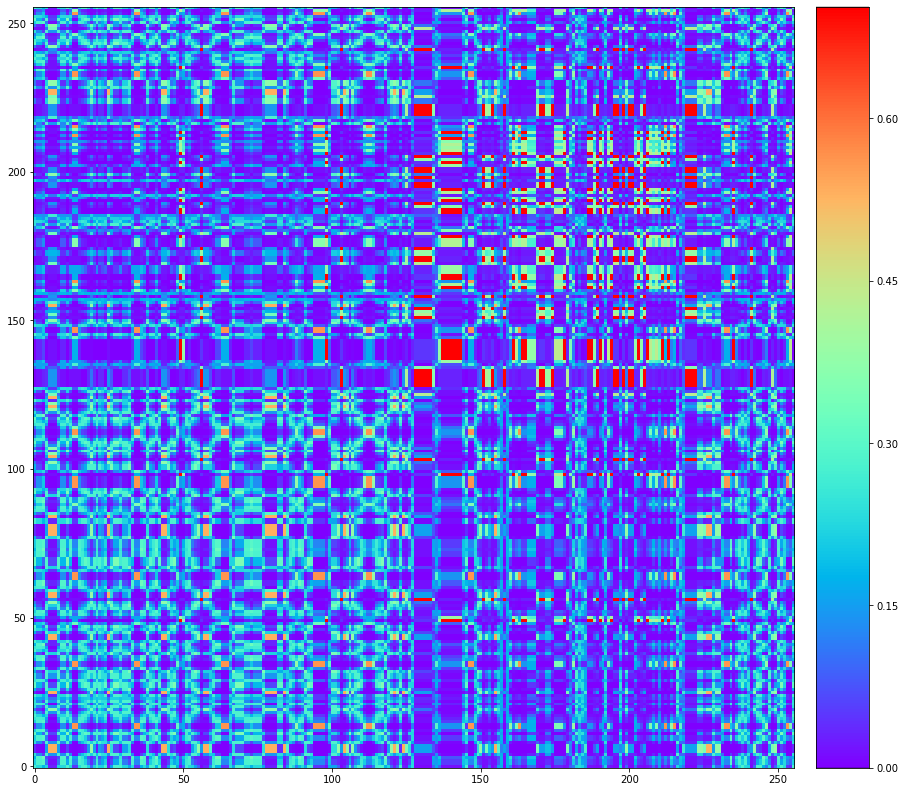

In [17]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
mtf = MarkovTransitionField(image_size = 256)
X_mtf = mtf.fit_transform(sample)

fig = plt.figure(figsize = (24, 14))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_mtf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

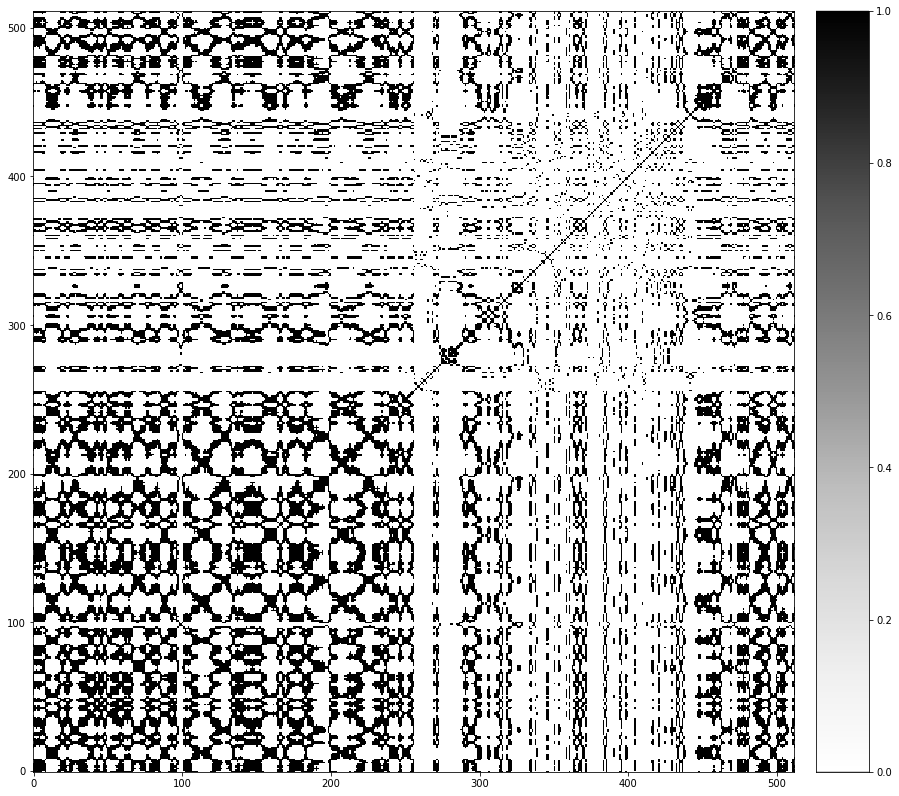

In [37]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
mtf = RecurrencePlot(threshold = 'point', percentage = 25)
X_mtf = mtf.fit_transform(sample)

fig = plt.figure(figsize = (24, 14))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_mtf[0], cmap = 'Greys', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()